# Quantificação de imagens e histograma

## *Leonardo Sales Araujo*
### *PEMM/COPPE - Universidade Federal do Rio de Janeiro*

### A primeira parte consiste em carregar os módulos necessários

In [1]:
#carrega os módulos necessários ao código
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

### Carrega-se a imagem original e coleta os dados de cada cor

In [2]:
#carrega a imagem do subdiretorio "img"
imagem = cv2.imread('img/im_ex_13.jpg')
#o python carrega a imagem em BGR e deve ser convertida para RGB
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

#alternativamente, pode-se carregar a imagem com matplotlib
#imagem = plt.imread('img/im_ex_B_HRI.jpg')

vermelho=imagem[:,:,0]
verde=imagem[:,:,1]
azul=imagem[:,:,2]

### representa a figura e seus canais de cores

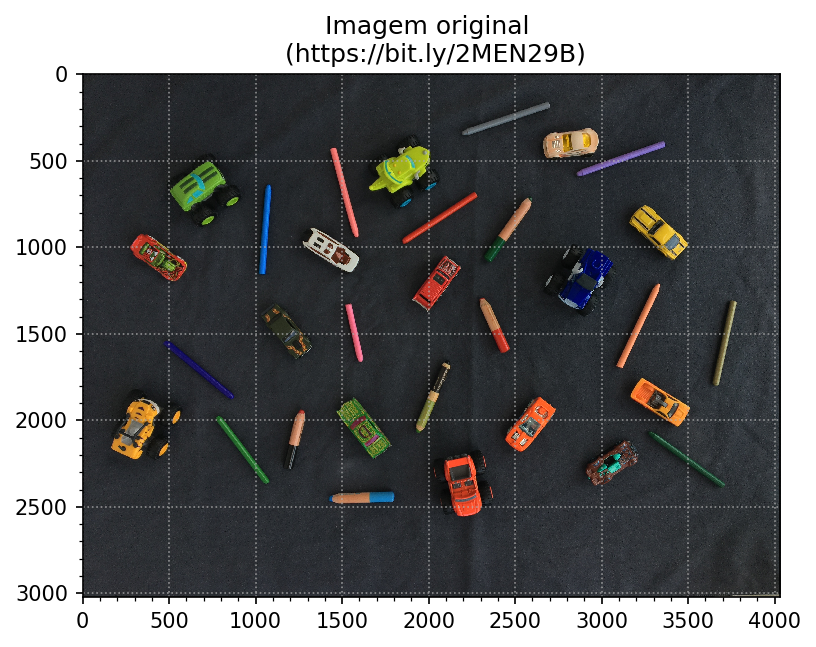

In [3]:
#mostra a figura
plt.figure(1, figsize=(6,6),dpi=150)
plt.title('Imagem original \n (https://bit.ly/2MEN29B)')
plt.imshow(imagem)
#plt.xlim(3600,3800)
#plt.ylim(1800,2000)
plt.minorticks_on()
plt.grid(alpha=0.75,linestyle=':')
plt.show()

### Representa os canais de cores

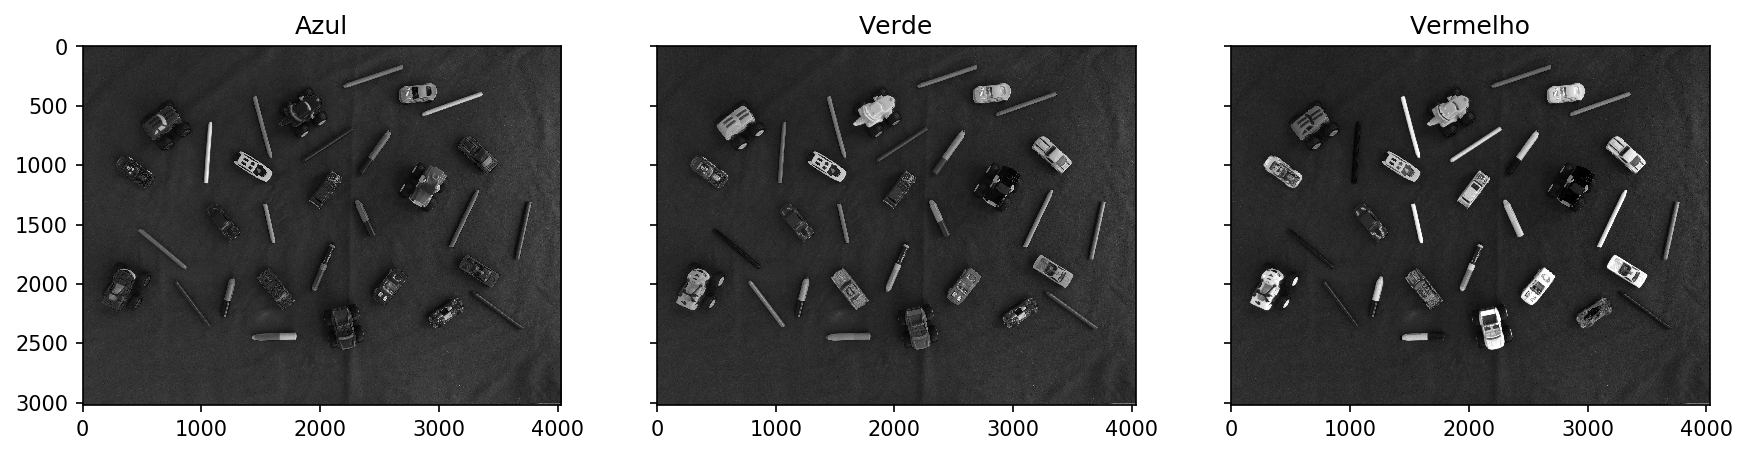

In [4]:
#representa os canais de cores
plt.figure(2, figsize=(14,16),dpi=150)
plt.subplot(131)
plt.imshow(azul,cmap='gray',vmin=0, vmax=255)
plt.title('Azul')

plt.subplot(132)
plt.imshow(verde,cmap='gray',vmin=0, vmax=255)
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])
plt.title('Verde')

plt.subplot(133)
plt.imshow(vermelho,cmap='gray',vmin=0, vmax=255)
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])
plt.title('Vermelho')

plt.show()

### Define uma área de interesse (ROI)

In [5]:
#região de interesse (ROI)
#roi = im[y1:y2, x1:x2]
x=1800
y=2000
roi = imagem[y:y+10,x:x+10,:]
#divide os canais coloridos em R,G,B
rvm=roi[:,:,0]
rvd=roi[:,:,1]
raz=roi[:,:,2]

### Apresenta as imagens e os valores de vermelho, verde e azul de cada *pixel* dessa região

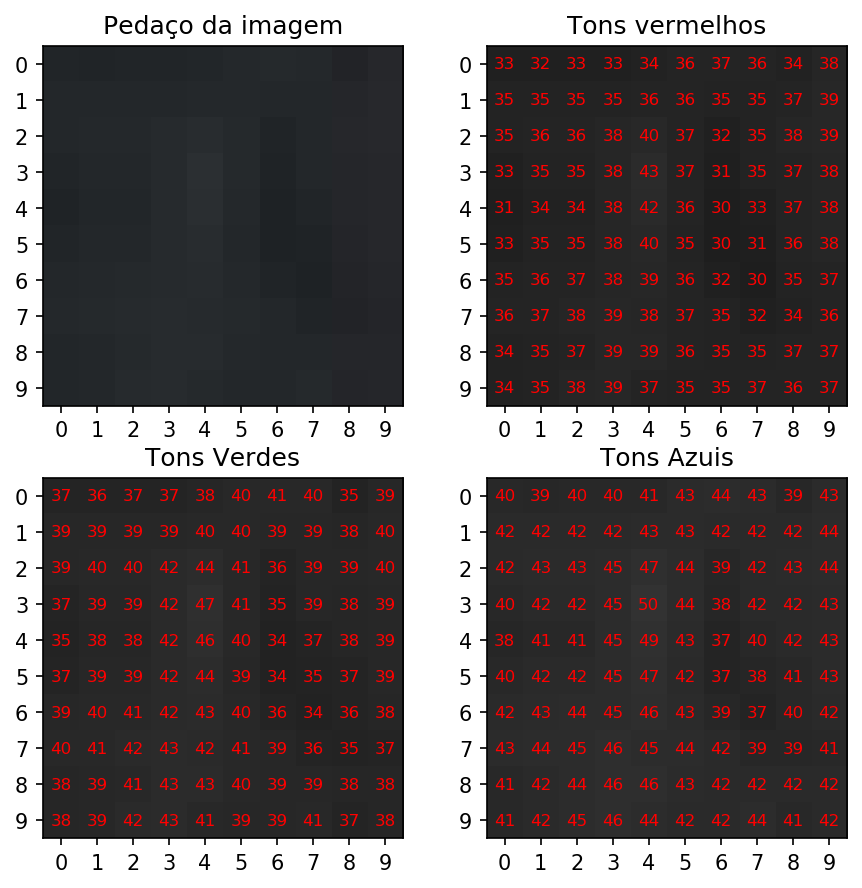

In [6]:
plt.figure(3, figsize=(7,7),dpi=150)
tfe=8
plt.subplot(221)
plt.title('Pedaço da imagem')
plt.imshow(roi)
ax = plt.gca()
ax.set_xticks(np.arange(len(roi[0,:,0])))
ax.set_yticks(np.arange(len(roi[:,0,0])))
#plt.grid(alpha=0.75,linestyle=':')

plt.subplot(222)
plt.imshow(rvm,cmap='gray',vmin=0, vmax=255)
ax = plt.gca()
# Queremos mostrar todos os ticks...
ax.set_xticks(np.arange(len(roi[0,:,0])))
ax.set_yticks(np.arange(len(roi[:,0,0])))

# Loop over data dimensions and create text annotations.
for i in range(len(roi[:,0,0])):
    for j in range(len(roi[0,:,0])):
        text = ax.text(j, i, rvm[i, j],ha="center", va="center", color="r",fontsize=tfe)

plt.title("Tons vermelhos")
#fig.tight_layout()

plt.subplot(223)
plt.imshow(rvd,cmap='gray',vmin=0, vmax=255)
ax = plt.gca()
# Queremos mostrar todos os ticks...
ax.set_xticks(np.arange(len(roi[0,:,0])))
ax.set_yticks(np.arange(len(roi[:,0,0])))

# Loop over data dimensions and create text annotations.
for i in range(len(roi[:,0,0])):
    for j in range(len(roi[0,:,0])):
        text = ax.text(j, i, rvd[i, j],ha="center", va="center", color="r",fontsize=tfe)

plt.title("Tons Verdes")
#fig.tight_layout()

plt.subplot(224)
plt.imshow(raz,cmap='gray',vmin=0, vmax=255)
ax = plt.gca()
# Queremos mostrar todos os ticks...
ax.set_xticks(np.arange(len(roi[0,:,0])))
ax.set_yticks(np.arange(len(roi[:,0,0])))

# Loop over data dimensions and create text annotations.
for i in range(len(roi[:,0,0])):
    for j in range(len(roi[0,:,0])):
        text = ax.text(j, i, raz[i, j],ha="center", va="center", color="r",fontsize=tfe)

plt.title("Tons Azuis")
#fig.tight_layout()

plt.show()

### Gera o histograma das cores

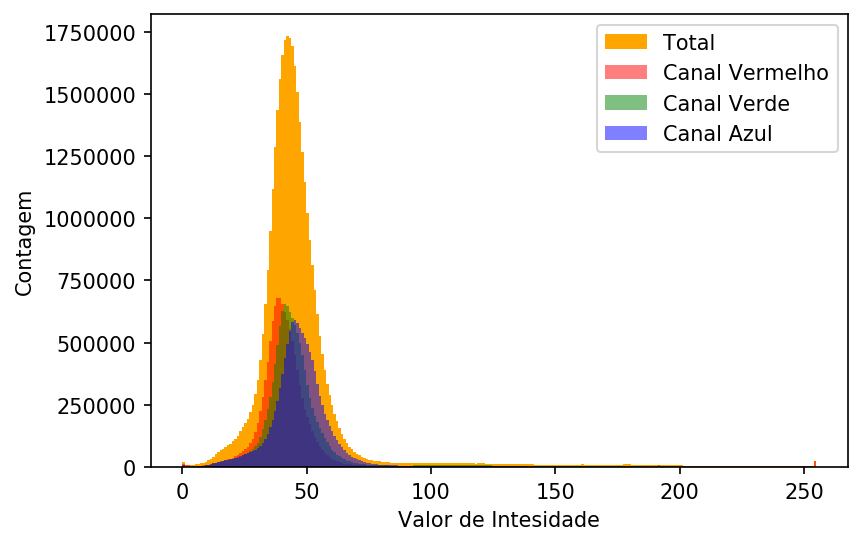

In [7]:
#cria o histograma colorido
plt.figure(4,dpi=150)
plt.hist(imagem.ravel(), bins = 256, color = 'orange')
plt.hist(imagem[:,:,0].ravel(), bins = 256, color = 'red', alpha = 0.5)
plt.hist(imagem[:,:,1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
plt.hist(imagem[:,:,2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
plt.xlabel('Valor de Intesidade')
plt.ylabel('Contagem')
plt.legend(['Total', 'Canal Vermelho', 'Canal Verde', 'Canal Azul'])
plt.show()

### Converte a imagem em tons de cinza

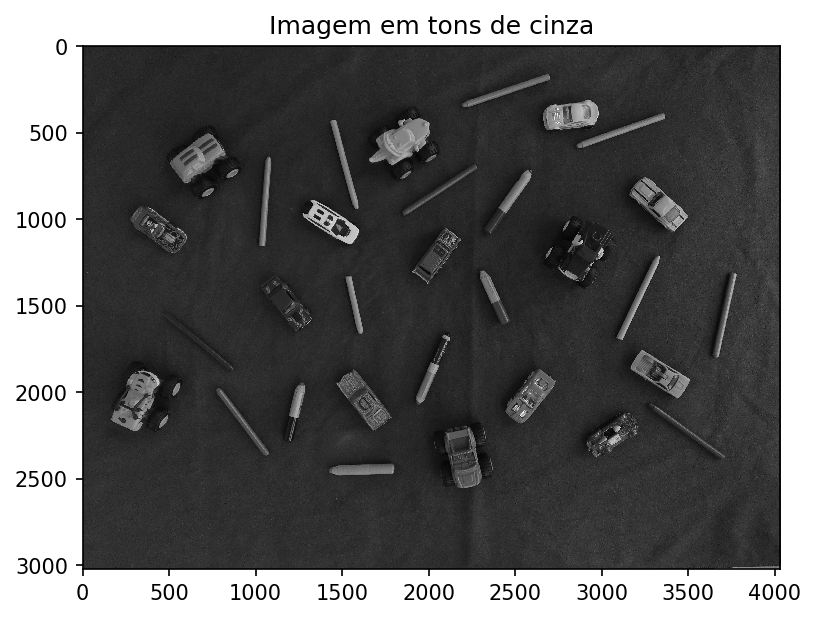

In [8]:
#carrega a imagem já em tons de cinza
cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
#mostra a figura
plt.figure(5, figsize=(6,6),dpi=150)
plt.title('Imagem em tons de cinza')
plt.imshow(cinza, cmap='gray',vmin=0, vmax=255)
plt.show()

### Constrói-se o histograma com escala linear e log da imagem em tons de cinza

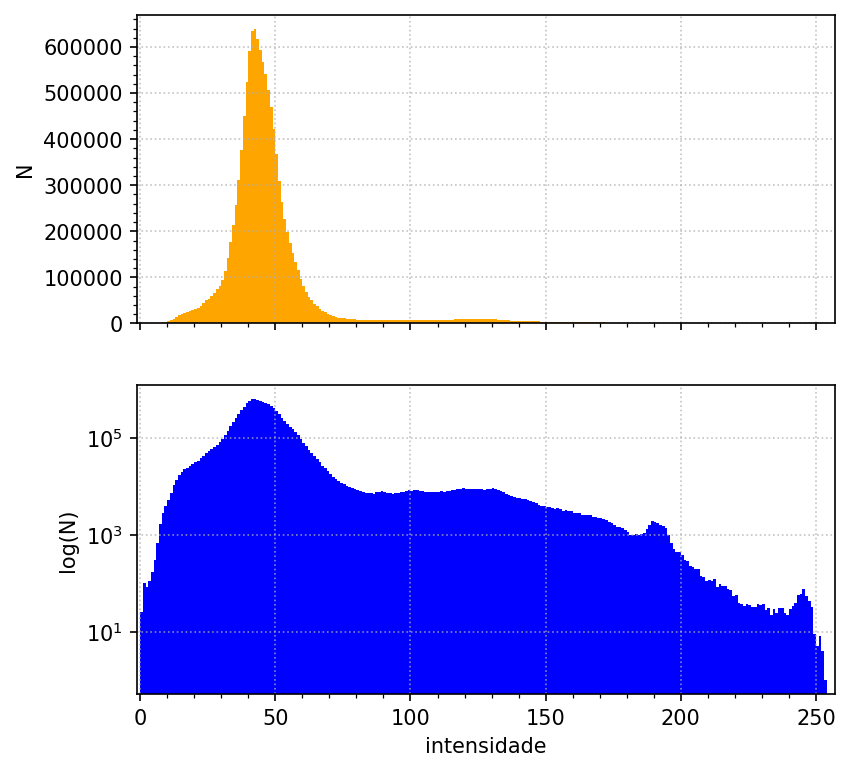

In [9]:
#determina o histograma da imagem em tons de cinza
histograma = cv2.calcHist([cinza],[0],None,[256], [0,256])

#mostra o histograma normal e log
plt.figure(6, figsize=(6, 6), dpi=150)
#hostograma normal
plt.subplot(211)
plt.hist(cinza.ravel(),256,[0,256],color = 'orange')
plt.xlim(-1, 257)
plt.ylabel('N')
plt.minorticks_on()
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
plt.grid(alpha=0.75,linestyle=':')

#histograma log
plt.subplot(212)
plt.hist(cinza.ravel(),256,[0,256],color = 'blue')
plt.yscale('log')
plt.xlim(-1, 257)
plt.ylabel('log(N)')
plt.xlabel('intensidade')
plt.minorticks_on()
plt.grid(alpha=0.75,linestyle=':')
plt.show()

### Aplica-se o filtro de Gaussian blur à imagem

In [10]:
#faz a mediana da imagem
blur_cinza = cv2.GaussianBlur(cinza,(5,5),0)
#determina o histograma
blur_histograma = cv2.calcHist([blur_cinza],[0],None,[256], [0,256])

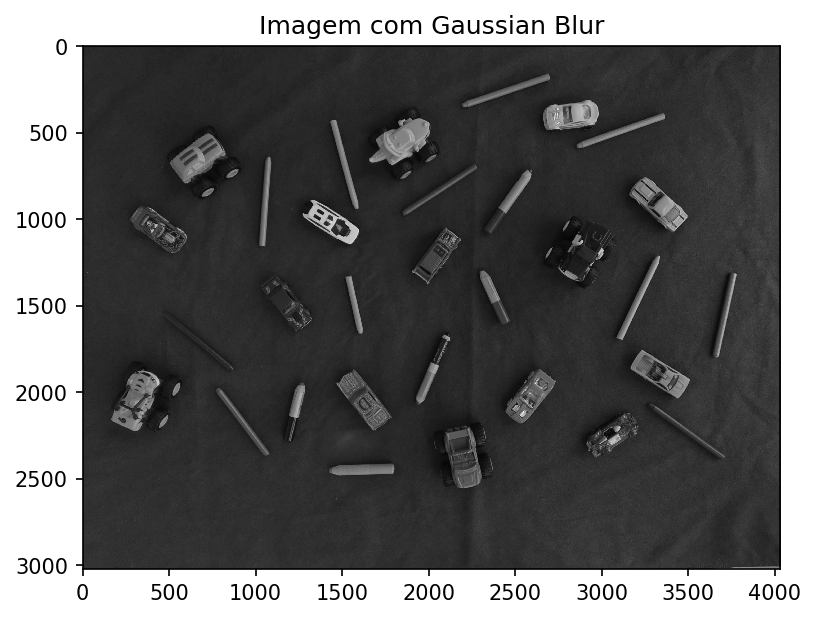

In [11]:
#mostra a imagem
plt.figure(6, figsize=(6,6),dpi=150)
plt.imshow(blur_cinza, cmap='gray',vmin=0, vmax=255)
plt.title('Imagem com Gaussian Blur')
plt.show()

### Constrói-se o histograma com escala linear e log da imagem em tons de cinza da imagem modificada com o filtro

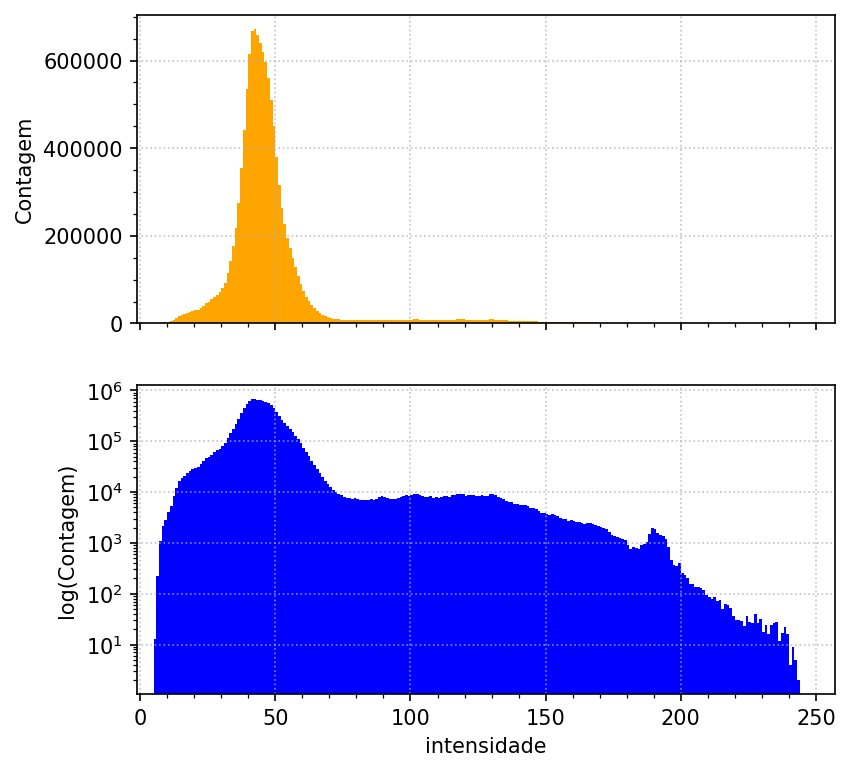

In [12]:
#mostra o histograma normal e log
plt.figure(7, figsize=(6, 6), dpi=150)
#hostograma normal
plt.subplot(211)
plt.hist(blur_cinza.ravel(),256,[0,256],color = 'orange')
plt.xlim(-1, 257)
plt.ylabel('Contagem')
plt.minorticks_on()
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
plt.grid(alpha=0.75,linestyle=':')

#histograma log
plt.subplot(212)
plt.hist(blur_cinza.ravel(),256,[0,256],color = 'blue')
plt.yscale('log')
plt.xlim(-1, 257)
plt.ylabel('log(Contagem)')
plt.xlabel('intensidade')
plt.minorticks_on()
plt.grid(alpha=0.75,linestyle=':')
plt.show()